<a href="https://colab.research.google.com/github/ankesh86/RecommendationSystems/blob/main/PopularityBased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

#import viz libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data

In [4]:
df = pd.read_csv('sample_data/data.csv', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# calculating null values
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
# drop where description is not available
df_new = df.dropna(subset=['Description'])
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df_new = df_new[df_new.Quantity>0]
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,530693.000000,530693.000000,397924.000000
mean,10.605819,3.861599,15294.315171
std,156.637853,41.833162,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


# Segmenting

In [8]:
#popular items globally
global_popularity = df_new.pivot_table(index=['StockCode','Description'],values='Quantity', aggfunc='sum').sort_values(by='Quantity', ascending=False)
print('Top 10 popular items globally....')
global_popularity.head(10)


Top 10 popular items globally....


,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
85099B,JUMBO BAG RED RETROSPOT,48478
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603
22197,POPCORN HOLDER,36761
84879,ASSORTED COLOUR BIRD ORNAMENT,36461
21212,PACK OF 72 RETROSPOT CAKE CASES,36419
23084,RABBIT NIGHT LIGHT,30788


Text(0, 0.5, 'Item')

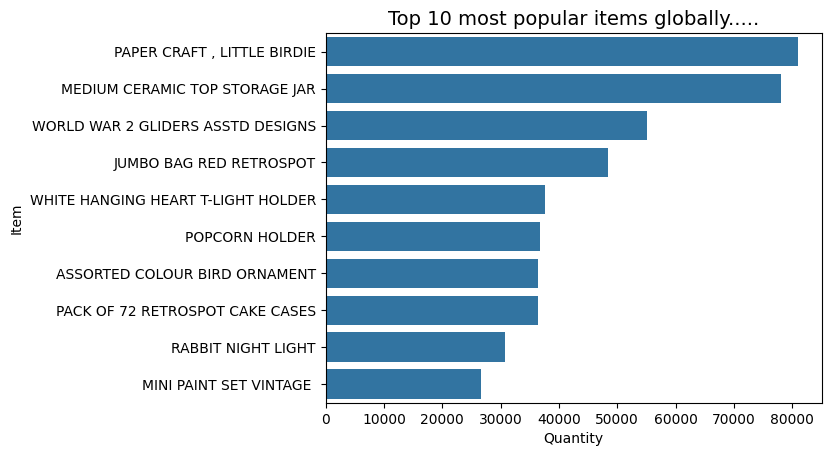

In [9]:
#visualization
global_popularity.reset_index(inplace=True)
sns.barplot(y='Description', x='Quantity', data=global_popularity.head(10))
plt.title('Top 10 most popular items globally.....', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

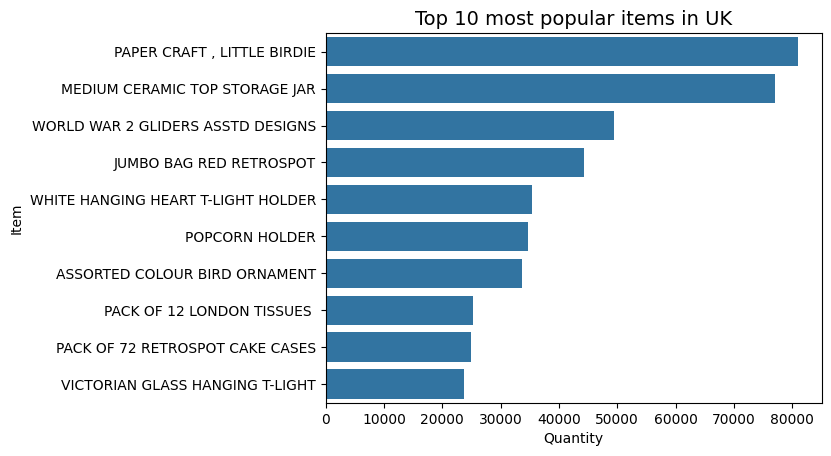

In [10]:
#popular items by country
countrywise = df_new.pivot_table(index=['Country','StockCode','Description'], values='Quantity', aggfunc='sum').reset_index()

#visual top 10 items in UK
sns.barplot(y='Description',x='Quantity', data=countrywise[countrywise['Country']=='United Kingdom'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 most popular items in UK', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

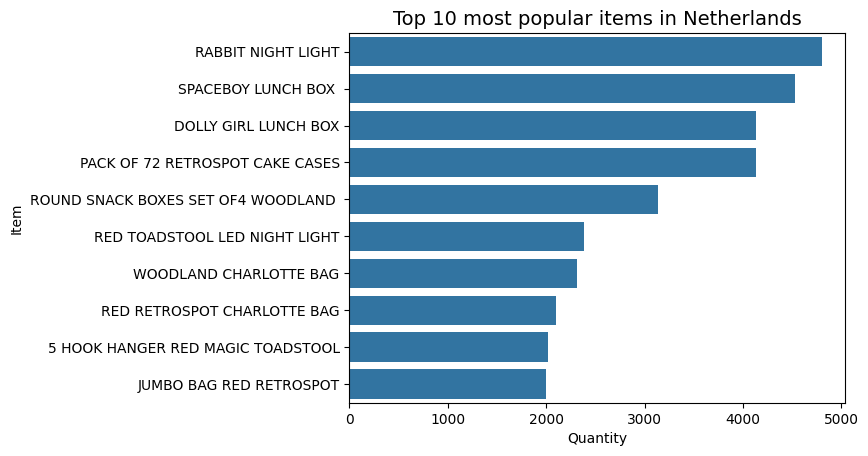

In [12]:
#visual top 10 items in Netherlands
sns.barplot(y='Description',x='Quantity', data=countrywise[countrywise['Country']=='Netherlands'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 most popular items in Netherlands', fontsize=14)
plt.ylabel('Item')

# **Buy again output**

In [13]:
#function to buy again
from collections import Counter
def buy_again(customerid):

  #fetching the items bought by the customer for provided customer id
  items_bought = df_new[df_new['CustomerID']==customerid].Description

  #count and sort the repeated purchases
  bought_again = Counter(items_bought)

  # convert counter to list for printing recommendations
  buy_again_list = list(bought_again)

  #printing the recommendation
  print('Items you would like to buy again')
  return(buy_again_list)


In [14]:
buy_again(17850)

Items you would like to buy again


['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'EDWARDIAN PARASOL RED',
 'RETRO COFFEE MUGS ASSORTED',
 'SAVE THE PLANET MUG',
 'VINTAGE BILLBOARD DRINK ME MUG',
 'VINTAGE BILLBOARD LOVE/HATE MUG',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'WOOD S/3 CABINET ANT WHITE FINISH',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'EDWARDIAN PARASOL BLACK',
 'IVORY EMBROIDERED QUILT ',
 'JUMBO SHOPPER VINTAGE RED PAISLEY']